
# Frontmatter
[Here](https://github.com/Xianzhiwang1/CS0451-page-site/tree/main/posts/) is a link to the source code for this perceptron blog post.

# Intro under Construction.
In this blog post I am going to discuss kernel logistic regression for binary classification. 




# Implementation 
# Under Construction.

In [1]:

%load_ext autoreload
%autoreload 2

First, let's import some libraries.

In [9]:
import numpy as np
from matplotlib import pyplot as plt

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
        print(w)
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

[0.49052914 0.75551445]


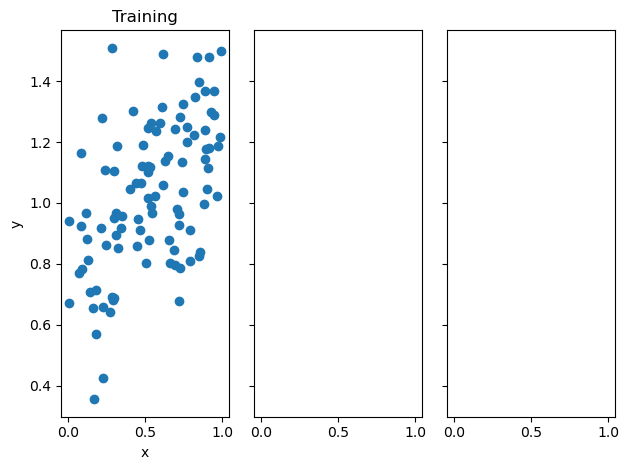

In [25]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 3, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
# axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
# labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

Here's some math equations that makes all this work:

### $$ \hat{w} = \arg \min_{w} L(w) $$

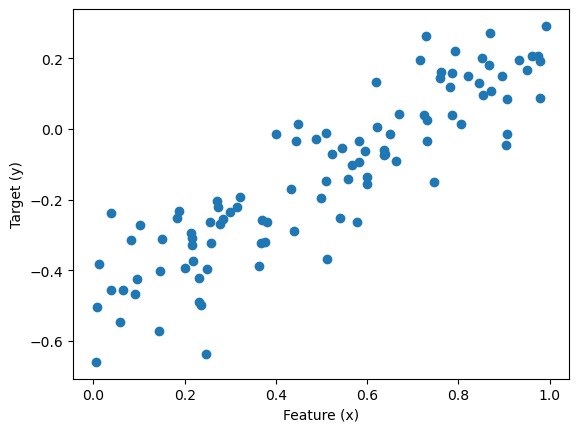

In [24]:

w0 = -0.5
w1 =  0.7

n = 100
x = np.random.rand(n, 1)
y = w1*x + w0 + 0.1*np.random.randn(n, 1)

plt.scatter(x, y)
labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")

In [5]:
# from sklearn.metrics.pairwise import rbf_kernel
from linear_regression import LinearRegression 
LR = LinearRegression()
# LR.fit_analytic(X_train, y_train) # I used the analytical formula as my default fit method
# print(f"Training score = {LR.score(X_train, y_train).round(4)}")
# print(f"Validation score = {LR.score(X_val, y_val).round(4)}")

In [40]:
from linear_regression import LinearRegression 
LR = LinearRegression()
X_ = LR.pad(x)
LR.fit_gradient(X_,y)

new 25.2472427255503
prev 25.2472427255503
***
new 38.90755321504917
prev 38.90755321504917
***
new 59.999166005779045
prev 59.999166005779045
***
new 92.54698621365628
prev 92.54698621365628
***
new 142.7639134947236
prev 142.7639134947236
***
new 220.23651549196953
prev 220.23651549196953
***
new 339.754994173443
prev 339.754994173443
***
new 524.1366966636361
prev 524.1366966636361
***
new 808.5821551804639
prev 808.5821551804639
***
new 1247.395246180656
prev 1247.395246180656
***
new 1924.3504104044525
prev 1924.3504104044525
***
new 2968.6861482655963
prev 2968.6861482655963
***
new 4579.778128984155
prev 4579.778128984155
***
new 7065.202291385354
prev 7065.202291385354
***
new 10899.454618129786
prev 10899.454618129786
***
new 16814.53786146495
prev 16814.53786146495
***
new 25939.70926538657
prev 25939.70926538657
***
new 40017.0687273466
prev 40017.0687273466
***
new 61734.14565258266
prev 61734.14565258266
***
new 95236.97914670255
prev 95236.97914670255
***
new 146921.64444

In [41]:
print(LR.history)

[25.2472427255503, 25.2472427255503, 38.90755321504917, 38.90755321504917, 59.999166005779045, 59.999166005779045, 92.54698621365628, 92.54698621365628, 142.7639134947236, 142.7639134947236, 220.23651549196953, 220.23651549196953, 339.754994173443, 339.754994173443, 524.1366966636361, 524.1366966636361, 808.5821551804639, 808.5821551804639, 1247.395246180656, 1247.395246180656, 1924.3504104044525, 1924.3504104044525, 2968.6861482655963, 2968.6861482655963, 4579.778128984155, 4579.778128984155, 7065.202291385354, 7065.202291385354, 10899.454618129786, 10899.454618129786, 16814.53786146495, 16814.53786146495, 25939.70926538657, 25939.70926538657, 40017.0687273466, 40017.0687273466, 61734.14565258266, 61734.14565258266, 95236.97914670255, 95236.97914670255, 146921.64444091456, 146921.64444091456, 226655.33702422006, 226655.33702422006, 349660.13345068326, 349660.13345068326, 539419.0603688526, 539419.0603688526, 832159.2736871026, 832159.2736871026, 1283768.2382049405, 1283768.2382049405,

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

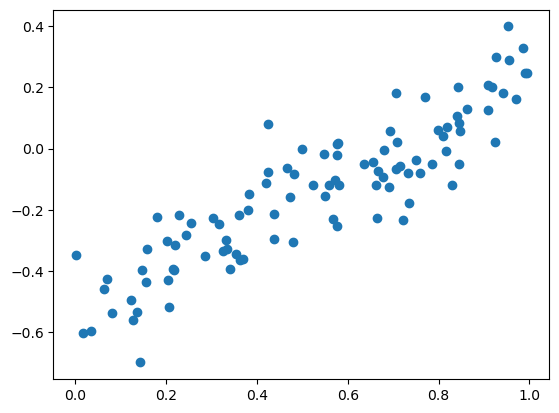

In [ ]:
plt.scatter(x, y)
plt.plot(x, X@LR.w, color = "black")
labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")
# labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")

# under construction fit analytic

[[ 0.74529173]
 [-0.53399651]]


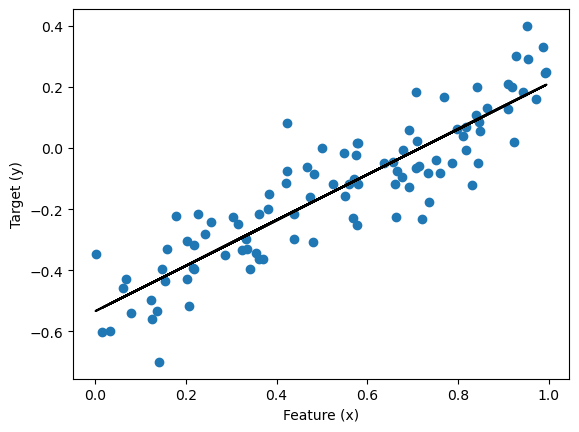

In [ ]:
X = LR.pad(x)
LR.fit_analytic(x,y)
plt.scatter(x, y)
plt.plot(x, X@LR.w_analytic, color = "black")
labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")
# labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")
print(LR.w_analytic)